# Build up Covid-19 model

Covid-19 dataset link is : https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset

Frist try to Transfer-learning  Feature Extraction than lavel up to use fine-tunnig 

##preprocessing data and load directory

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8c1c2a0e-14f3-2689-dd34-0463c4c873e8)


In [3]:
# download halper function file and import some function
!wget https://raw.githubusercontent.com/iamzen24/course_project/main/halper_function.py


--2022-08-23 02:24:13--  https://raw.githubusercontent.com/iamzen24/course_project/main/halper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10235 (10.0K) [text/plain]
Saving to: ‘halper_function.py’

halper_function.py  100%[===================>]  10.00K  --.-KB/s    in 0s      

2022-08-23 02:24:14 (53.8 MB/s) - ‘halper_function.py’ saved [10235/10235]



In [4]:
# set up directory path
train_covid_19_dir = "drive/MyDrive/Covid19-dataset/train/"
test_covid_19_dir = "drive/MyDrive/Covid19-dataset/test/"

In [5]:
# now import some important libary
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras 
from halper_function import create_tensorboard_callback,plot_loss_curves,unzip_data,load_and_prep_image,pred_and_plot,walk_through_dir


In [6]:
# let's see how many image have each directory
walk_through_dir("drive/MyDrive/Covid19-dataset")

There are 2 directories and 0 images in 'drive/MyDrive/Covid19-dataset'.
There are 3 directories and 0 images in 'drive/MyDrive/Covid19-dataset/test'.
There are 1 directories and 20 images in 'drive/MyDrive/Covid19-dataset/test/Viral Pneumonia'.
There are 0 directories and 0 images in 'drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/.ipynb_checkpoints'.
There are 0 directories and 20 images in 'drive/MyDrive/Covid19-dataset/test/Normal'.
There are 0 directories and 26 images in 'drive/MyDrive/Covid19-dataset/test/Covid'.
There are 3 directories and 0 images in 'drive/MyDrive/Covid19-dataset/train'.
There are 0 directories and 71 images in 'drive/MyDrive/Covid19-dataset/train/Normal'.
There are 0 directories and 111 images in 'drive/MyDrive/Covid19-dataset/train/Covid'.
There are 0 directories and 70 images in 'drive/MyDrive/Covid19-dataset/train/Viral Pneumonia'.


## Create the model Transfer-Learning feature extraction 

In [8]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
train_data_dir = pathlib.Path(train_covid_19_dir) # turn our training path into a Python path
test_data_dir = pathlib.Path(test_covid_19_dir) # turn out testing  pathinto a python path
class_names = np.array(sorted([item.name for item in train_data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Covid' 'Normal' 'Viral Pneumonia']


In [16]:
import cv2
import os
import re
img_size = 244

def get_image_from_directory(data_dir):
    image_bgr = []
    label = []
    print(data_dir)
    for file in data_dir.glob("*"):
        for image in file.glob("*"):
            if re.search(r"(Normal)",str(image)):
                print(image)
                _image = cv2.imread(str(image))
                if not _image is None: # check to see image is not empty
                    label.append("Noraml")
                    resize_image = cv2.resize(_image, (img_size, img_size),interpolation = cv2.INTER_NEAREST)
                    image_bgr.append(resize_image)
            elif re.search(r"Viral Pneumonia",str(image)):
                print(image)
                _image = cv2.imread(str(image))
                if not _image is None: # check to see image is not empty
                    label.append("Viral Pneumonia")
                    resize_image = cv2.resize(_image, (img_size, img_size),interpolation = cv2.INTER_NEAREST)
                    image_bgr.append(resize_image)
            elif re.search(r"Covid",str(image)):
                print(image)
                _image = cv2.imread(str(image))
                if not _image is None: # check to see image is not empty
                    label.append("Covid")
                    resize_image = cv2.resize(_image, (img_size, img_size),interpolation = cv2.INTER_NEAREST)
                    image_bgr.append(resize_image)
    return image_bgr,label
        

In [12]:
train_image_bgr,train_label = get_image_from_directory(train_data_dir)
test_image_bgr,test_label = get_image_from_directory(test_data_dir)

drive/MyDrive/Covid19-dataset/train
drive/MyDrive/Covid19-dataset/train/Normal/022.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/018.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/025.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/04.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/050.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/011.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/016.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/051.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/01.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/052.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/013.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/012.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/015.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/05.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/021.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/03.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/017.jpeg
drive/MyDrive/Covid19-dataset/train/Normal/02.jpeg
drive/MyDrive/Covid19-dataset/tra

In [13]:
print(np.array(train_image_bgr[0]).shape)
print(np.array(test_image_bgr[0]).shape)


(244, 244, 3)
(244, 244, 3)


In [14]:
np.unique(train_label)

array(['Covid', 'Noraml', 'Viral Pneumonia'], dtype='<U15')

In [15]:
train_label = tf.expand_dims(train_label,axis=1)
test_label = tf.expand_dims(test_label,axis=1)
np.unique(train_label),np.unique(test_label)

(array([b'Covid', b'Noraml', b'Viral Pneumonia'], dtype=object),
 array([b'Covid', b'Noraml', b'Viral Pneumonia'], dtype=object))

In [17]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_label(label):
    label_one_hot = OneHotEncoder(sparse=False)
    train_label_one_hot = label_one_hot.fit_transform(label)
    return train_label_one_hot

train_label_one_hot = one_hot_label(train_label)
test_label_one_hot = one_hot_label(test_label)

In [18]:
train_label_one_hot[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [19]:
test_label_one_hot[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [20]:
print(np.array(train_image_bgr).shape)
print(np.array(test_image_bgr).shape)
print(np.array(train_label_one_hot).shape)
print(np.array(test_label_one_hot).shape)

(252, 244, 244, 3)
(66, 244, 244, 3)
(252, 3)
(66, 3)


In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_image_bgr,train_label_one_hot)).batch(32).shuffle(100).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_image_bgr,test_label_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

## same model create but this time Vgg16 pretranined model use

In [26]:
tf.random.set_seed(42)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
base_model = VGG16(weights='imagenet', include_top=False,
                            input_shape=(img_size, img_size,3))

# freeze extraction layers
base_model.trainable = False

# add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024 , activation='relu')(x)
x = Dense(1024 , activation='relu')(x)
x = Dense(512 , activation='relu')(x)
x = Dense(512 , activation='relu')(x)
x = Dense(256 , activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)
model = keras.Model(inputs=base_model.input, outputs=predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable==True:
        print(layer)

In [27]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [28]:
tf.random.set_seed(42)
history = model.fit(train_dataset,
                    epochs = 10,
                    validation_data=test_dataset,
                    verbose = 1,
                    callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath="opencv_preprocessing_data_model",save_best_only=True)])

Epoch 1/10
8/8 [==============================] - 5s 607ms/step - loss: 4.8152 - accuracy: 0.4683 - val_loss: 1.8677 - val_accuracy: 0.3030
Epoch 2/10
8/8 [==============================] - 2s 236ms/step - loss: 1.8717 - accuracy: 0.6468 - val_loss: 2.0398 - val_accuracy: 0.6061
Epoch 3/10
8/8 [==============================] - 34s 5s/step - loss: 1.1461 - accuracy: 0.6230 - val_loss: 0.7310 - val_accuracy: 0.6515
Epoch 4/10
8/8 [==============================] - 4s 551ms/step - loss: 0.6142 - accuracy: 0.6944 - val_loss: 0.5647 - val_accuracy: 0.6364
Epoch 5/10
8/8 [==============================] - 5s 612ms/step - loss: 0.5526 - accuracy: 0.7381 - val_loss: 0.4664 - val_accuracy: 0.7121
Epoch 6/10
8/8 [==============================] - 2s 241ms/step - loss: 0.4891 - accuracy: 0.7500 - val_loss: 0.8669 - val_accuracy: 0.6818
Epoch 7/10
8/8 [==============================] - 4s 600ms/step - loss: 0.3856 - accuracy: 0.8294 - val_loss: 0.3895 - val_accuracy: 0.8030
Epoch 8/10
8/8 [======

In [29]:
# load best model 
model = tf.keras.models.load_model("/content/opencv_preprocessing_data_model/")
model.evaluate(test_dataset)

3/3 [==============================] - 1s 104ms/step - loss: 0.3205 - accuracy: 0.8636


[0.320475310087204, 0.8636363744735718]

In [30]:
import matplotlib.pyplot as plt

# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plott(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
#   img = load_and_prep_image(filename,img_shape=240)
  img = cv2.imread(filename)
  img = cv2.resize(img, (img_size, img_size),interpolation = cv2.INTER_NEAREST)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

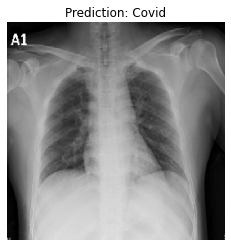

In [31]:
pred_and_plott(model,filename="/content/drive/MyDrive/Covid19-dataset/test/Covid/0105.png",class_names=class_names,)

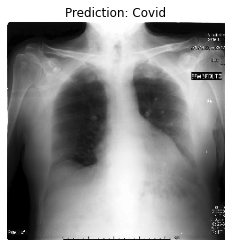

In [32]:
pred_and_plott(model,filename="/content/drive/MyDrive/Covid19-dataset/test/Covid/0118.jpeg",class_names=class_names)

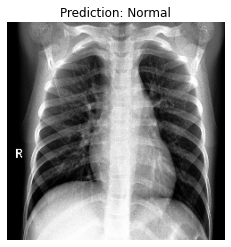

In [33]:
pred_and_plott(model,filename="/content/drive/MyDrive/Covid19-dataset/test/Normal/0103.jpeg",class_names=class_names)

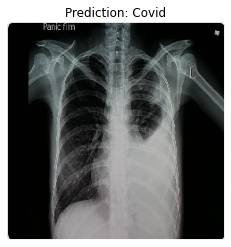

In [34]:
pred_and_plott(model,filename="/content/drive/MyDrive/Image/Viral_Pneumonia_1.jpg",class_names=class_names)

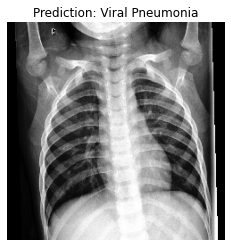

In [36]:
pred_and_plott(model,filename="/content/drive/MyDrive/Covid19-dataset/test/Normal/0115.jpeg",class_names=class_names)

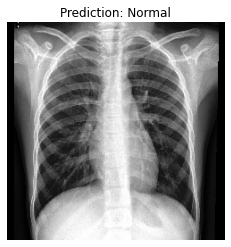

In [37]:
pred_and_plott(model,filename="/content/drive/MyDrive/Covid19-dataset/test/Normal/0120.jpeg",class_names=class_names)

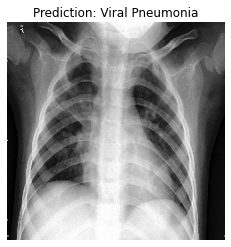

In [38]:
pred_and_plott(model,filename="/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0119.jpeg",class_names=class_names)